In [71]:
#panda needs tables
!python3.6 -m pip install tables

OSError: [Errno 12] Cannot allocate memory

In [8]:
#import packages
import seaborn as sb
import matplotlib as mpl
import h5py
import numpy as np
import pandas as pd 
import tables
from pandas.compat import StringIO, BytesIO 

mpl.rcParams['figure.dpi']= 250
pd.__file__

'/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'

In [9]:
#open hdf5 file for reading
hdf = pd.HDFStore('train.h5',mode='r')

#hdf keys
hdf.keys()

['/', '/table']

In [10]:
#extract 'table' dataset and display datatype                   
table = hdf.get('/table')
type(table)

pandas.core.frame.DataFrame

In [11]:
# display header 
table.head()

# As we can see, 'table' contains columns for each 4-vector consisting of energy (E_0) and momentum (PX,PY, PZ)
# 'table' also contains information at the end of it such as is_signal_new which indicates whether it is a top
# or a qcd (background) signal

,E_0,PX_0,PY_0,PZ_0,E_1,PX_1,PY_1,PZ_1,E_2,PX_2,...,E_199,PX_199,PY_199,PZ_199,truthE,truthPX,truthPY,truthPZ,ttv,is_signal_new
375,474.071136,-250.347031,-223.651962,-334.738098,103.236237,-48.866222,-56.790775,-71.025490,105.255569,-55.415001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
377,150.504532,120.062393,76.852005,-48.274265,82.257057,63.801739,42.754807,-29.454842,48.573559,36.763199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
378,251.645386,10.427651,-147.573746,203.564880,104.147797,10.718256,-54.497948,88.101395,78.043213,5.724113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
379,451.566132,129.885437,-99.066292,-420.984100,208.410919,59.033958,-46.177090,-194.467941,190.183304,54.069675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
380,399.093903,-168.432083,-47.205597,-358.717438,273.691956,-121.926941,-30.803854,-243.088928,152.837219,-44.400204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [12]:
#read hdf 
d = pd.read_hdf('train.h5','table')

#series = pd.Series([])
#hdf=pd.HDFStore('train.h5')
#df=hdf.select('df')

In [16]:
#purely integer-location based indexing for selection by position
wow = d.iloc[1210999]
type(d.iloc[100])

#print(wow)
#print(wow[0:5])

# wow is a large column array that corresponds a jet with 4-momenta of each element:
# E_0     221.000015
# PX_0    -32.458290
# PY_0   -127.960335
# PZ_0   -177.238876
# E_1     109.126007
# ...


pandas.core.series.Series

In [70]:
np.size(wow)


806

In [25]:
# calculating invariant mass for each event (row)
def calculate_mass(row):
    
    E_sum = 0
    PX_sum = 0
    PY_sum = 0
    PZ_sum = 0
    
    for i in range(0,199): 
        E_sum = E_sum + row['E_' + str(i)]
        PX_sum = PX_sum + row['PX_' + str(i)]
        PY_sum = PY_sum + row['PY_' + str(i)]
        PZ_sum = PZ_sum + row['PZ_' + str(i)]
    

    #print(E_sum**2)
    #print(PX_sum)
    #print(PY_sum)
    #print(PZ_sum)
    
    W = ( E_sum**2 - (PX_sum**2 + PY_sum**2 + PZ_sum**2) )**0.5
    
    return W

#dummy_trial = d.iloc[10070]
#print(dummy_trial)
mass = calculate_mass(d.iloc[10070])
print(mass)            

175.26903780107733


In [41]:
# QCD

j=0 
qcd_masses = pd.Series([])
top_masses = pd.Series([])

while j < 50000:
    
    if d.iloc[j]['is_signal_new'] == 0: 
    
        qcd_masses = qcd_masses.append(pd.Series([calculate_mass(d.iloc[j])]))
        
    
    else: 
        
        top_masses = top_masses.append(pd.Series([calculate_mass(d.iloc[j])]))
        
    if j%1500 == 0: 
        print(calculate_mass(d.iloc[j]))   
    
    j = j+1
    
#print(qcd_masses)
#print(top_masses)     

37.395616347371444
164.8485461284923
177.84054530186242
187.08285633150567
83.31910685988316
172.91228481482577
194.1613093251566
216.91430449810701
46.21456815837545
173.32011267310136
123.51360795488662
138.49647461550137
68.47295658193153
206.64673308368097
192.07298198640174
178.78489641323367
205.1977036528677
47.01092465772406
152.61437363625217
127.38697832467724
120.07022573562193
217.6735251899937
95.6705549480518
137.64136371825268
174.66248333171671
86.91605570324847
68.98294163038358
203.32057828578414
171.13953482303495
107.10196358146675
154.12401817120295
168.98720394013003
170.93103467357568
59.88494215676354


In [66]:
print('The number of qcd jets is:',len(qcd_masses))
print('The number of qcd jets is:',len(top_masses))

#type(qcd_masses)
#qcd_masses.head()
#top_masses[0]


The number of qcd jets is: 25060
The number of qcd jets is: 24940


QCD Entries: 25060
Top Entries: 24940


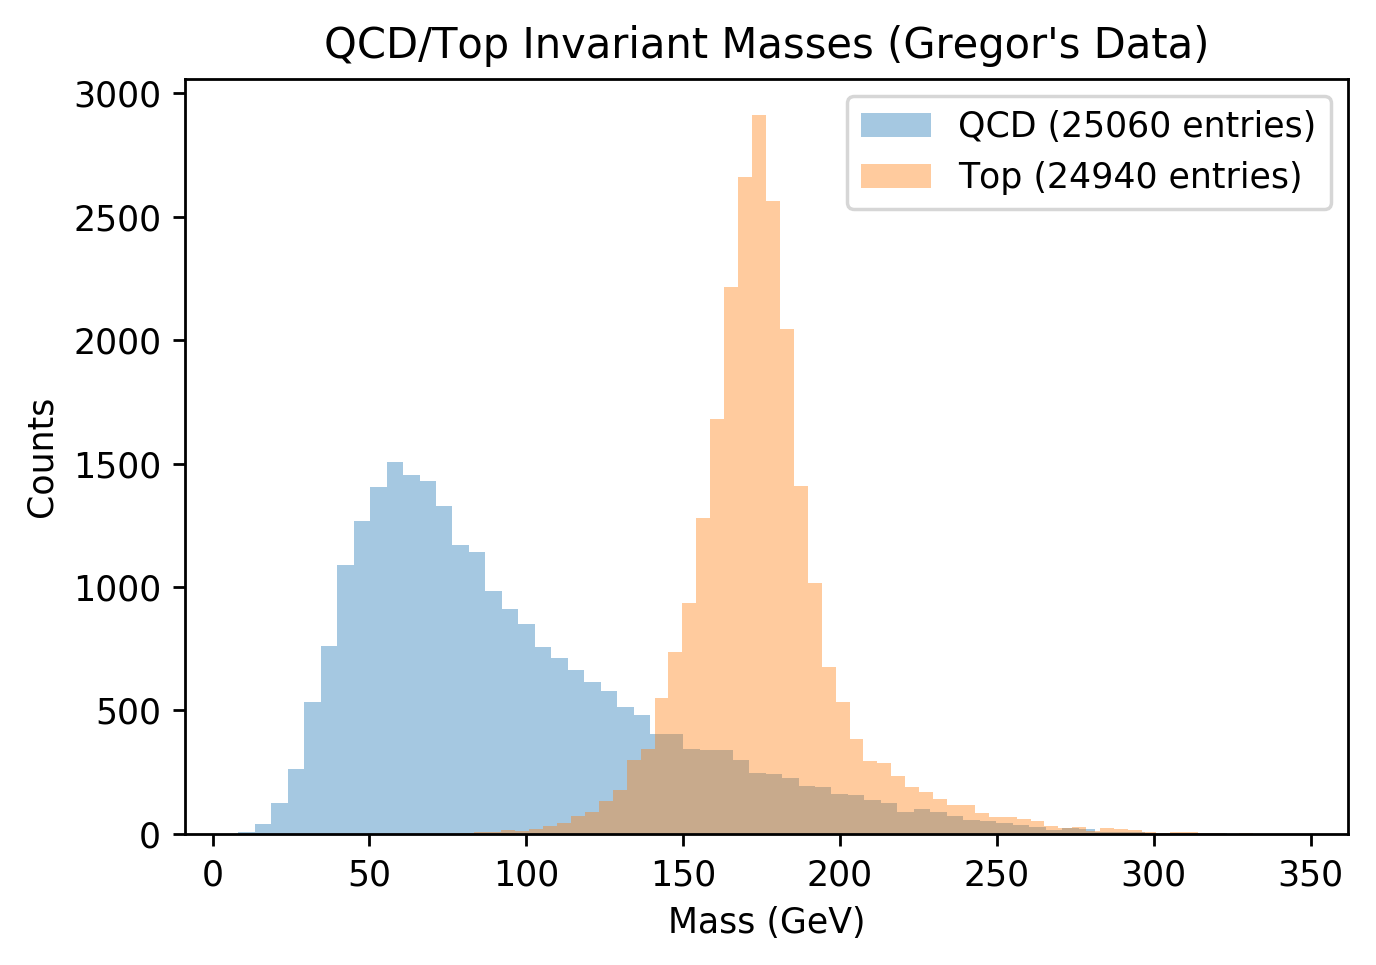

In [68]:
plot = sb.distplot(
    qcd_masses, 
    kde=False, 
    bins = 60
) 
top_plot = sb.distplot(
    top_masses, 
    kde=False, 
    bins = 60
) 

mpl.pyplot.title('QCD/Top Invariant Masses (Gregor\'s Data)')
mpl.pyplot.xlabel('Mass (GeV)')
mpl.pyplot.ylabel('Counts')
mpl.pyplot.legend(labels = ['QCD ('+ str(qcd_masses.size)+ ' entries)', 'Top (' + str(top_masses.size)+ ' entries)'])

print('QCD Entries: ' + str(qcd_masses.size))
print('Top Entries: ' + str(top_masses.size))

mpl.pyplot.savefig('QCD_top_masses.png')